In [104]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import math, random
from matplotlib import pyplot as plt, gridspec
import seaborn as sns
import statsmodels.api as sm
import itertools

%matplotlib inline

# Chapter 7 - Hypothesis Testing

## Formulas

Calculating the zcore (population standard deviation known):
$$z=\frac{\bar{y}-\mu_0}{\frac{\sigma}{\sqrt{n}}}$$

Calculating student's t score (when population standard deviation is unknown):
$$t=\frac{\bar{y}-\mu_0}{\frac{s}{\sqrt{n}}}$$

Calculating zscore of proportion (when population proportion is known):
$$z = \frac{p-\pi_0}{\sqrt{\frac{\pi (1-\pi)}{n}}}$$

When the population proportion is unknown, rather than replacing $\pi$ for $p$, it is better to test on the hypothesised population proportion $\pi_0$. The zscore then becomes:
$$z = \frac{p-\pi_0}{\sqrt{\frac{\pi_0 (1-\pi_0)}{n}}}$$

**Note**: <br/>
The standard error used to compute the confidence interval for a population proportion is:
$$\sqrt{\frac{p(1-p)}{n}}$$

whereas the standard error used to scale the corresponding z-statistic is:
$$\sqrt{\frac{\pi_0(1-\pi_0)}{n}}$$

## Notes

Suppose a car insurance company states in its annual report that the overall proportion of claimants in the past, up until a year ago, has been 25%. If there was no change in the propensity of insurers to make claims, it would be reasonable to hypothesise that the proportion of claimants in the most recent 12-month period has remained at 25%.

After taking a sample of 400 current insurers you find that 94 made a claim in the last year. What is the p-value obtained from testing this null hypothesis based on these data?

$H_0: \pi=0.25$ <br/>
$H_1: \pi \ne 0.25$

Formula: <br/>
$z = \frac{p-\pi_0}{\sqrt{\frac{\pi_0(1-\pi_0)}{n}}}$

In [36]:
n=400
obs = 94

p = obs/n
pi = 0.25

zstat = (p-pi)/(((pi*(1-pi))/n)**(1/2))
print(f'zstat = {zstat:.3f}')
print(f'p-value (2-tailed) = {stats.norm.sf(-zstat)*2:.3f}')

zstat = -0.693
p-value (2-tailed) = 0.488


Creating a scatter plot to check the assumption of normality

Theorised normal scores are calculated:

$\frac{1}{n+1}, \frac{2}{n+1}, \frac{3}{n+1}, \frac{4}{n+1}... \frac{x}{n+1}$

In [37]:
# Comparing to uniform distribution
n=100
mu = 13
sigma = 2.5

# Create datasets
norm_dist = np.random.normal(loc=mu, scale=sigma, size=n)
norm_dist.sort()
uni_dist = np.random.uniform(low=norm_dist.min(), high=norm_dist.max(), size=n)
uni_dist.sort()
comp_dist = stats.norm.ppf(np.arange(1,n+1)/(n+1))

# Compute linear regression for normal distribution
norm_slope, norm_intercept, norm_r_value, norm_p_value, norm_std_err = stats.linregress(norm_dist,comp_dist)

# Compute linerar regression for uniform distribution
uni_slope, uni_intercept, uni_r_value, uni_p_value, uni_std_err = stats.linregress(uni_dist,comp_dist)

In [38]:
# Create linear regression linspace for normal data
norm_x = np.arange(norm_dist.min(),norm_dist.max())
norm_y = (norm_slope*norm_x)+norm_intercept

# Create linear regression linspace for uniform data
uni_x = np.arange(uni_dist.min(),uni_dist.max())
uni_y = (uni_slope*uni_x)+uni_intercept

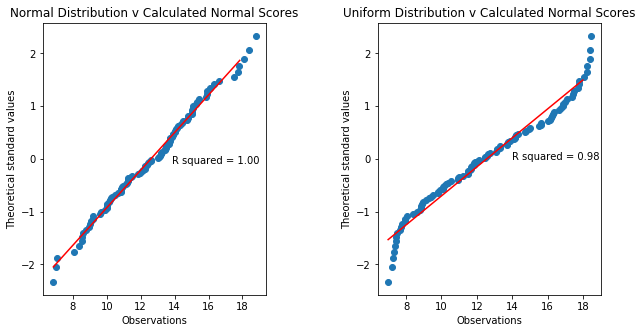

In [39]:
plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(1,2)
gs.update(wspace = .5)

plt.subplot(gs[:1])
plt.title('Normal Distribution v Calculated Normal Scores')
plt.scatter(norm_dist, comp_dist)
plt.plot(norm_x, norm_y, color='red')
plt.text(s=f'R squared = {norm_r_value:.2f}', x =norm_x.max()-4, y=norm_y.mean())
plt.xlabel('Observations')
plt.ylabel('Theoretical standard values')
plt.subplot(gs[1:])
plt.title('Uniform Distribution v Calculated Normal Scores')
plt.scatter(uni_dist, comp_dist)
plt.plot(uni_x, uni_y, color='red')
plt.text(s=f'R squared = {uni_r_value:.2f}', x =uni_x.max()-4, y=uni_y.mean())
plt.xlabel('Observations')
plt.ylabel('Theoretical standard values')
plt.show()

## Homework

### Problem 1

A data-processing company claims that its error rate for non-verified data entry is 1%. An audit reveals 113 errors among 9000 characters entered by a particular operator. Use these data to test the claim.

$H_0: \pi = 0.01$

$H_1: \pi \ne 0.01$

Formula:

$z = \frac{p-\pi_0}{\sqrt{\frac{\pi_0 (1-\pi_0)}{n}}}$

In [40]:
n=9000
t = 113
p = t/n
pi = 0.01

print(f'CLT assumptions applicable = {((pi*n>5) & ((1-pi)*n>5))}')
print(f'sample proportion = {p:.4f}')

CLT assumptions applicable = True
sample proportion = 0.0126


In [41]:
zscore = (p-pi)/(((pi*(1-pi))/n)**(1/2))
p_value = stats.norm.sf(x=2.48)
print(f'z-score = {zscore:.3f}')
print(f'p-value = {p_value*2:.4f}')

z-score = 2.437
p-value = 0.0131


### Problem 2

The national unemployment rate in Australia in December 1992 was 11.3% (Sydney Morning Herald: 7 May 1993).

$H_0: \pi=0.113$

Formula:

$z = \frac{p-\pi_0}{\sqrt{\frac{\pi_0(1-\pi_0)}{n}}}$

In [42]:
pi = .113

a.	Of 454 persons interviewed in Western Australia’s Chapman Valley in Pilbara, two were out of work. Test that this region’s unemployment rate is the same as the national average.

$H_1: \pi \ne 0.113$

In [43]:
n = 454
t = 2
p = t/n

z = (p-pi)/(((pi*(1-pi))/n)**(1/2))
p_value = stats.norm.sf(x=abs(z))
print(f'CLT assumption met = {(pi*n>5)&((1-pi)*n > 5)}')
print(f'z-score = {z:.3f}')
print(f'p-value = {p_value*2:.4f}')

CLT assumption met = True
z-score = -7.309
p-value = 0.0000


b.	In the Queensland settlement of Karawatha, 8 of 17 persons interviewed were unemployed. Is the unemployment rate in this area statistically different from the national average?

In [44]:
n = 17
t = 8
p = t/n

z = (p-pi)/(((pi*(1-pi))/n)**(1/2))
p_value = stats.norm.sf(x=abs(z))
print(f'CLT assumption met = {(pi*n>5)&((1-pi)*n > 5)}')
print(f'z-score = {z:.3f}')
print(f'p-value = {p_value*2:.4f}')

CLT assumption met = False
z-score = 4.657
p-value = 0.0000


c.	Check that any statistical assumptions you have made.

CLT assumption in part A is met; however it is not met in part B

### Problem 3

A United States senator, concerned about the effects of radioactive fallout on soldiers at a weapons test, asks the following question at a hearing of a government committee. “Given that 1500 soldiers who were exposed have been traced, and given that 25 of them have developed or died of a disease attributable to fallout, is this a ‘statistically significant’ result?” 

Answer the senator’s question, using the additional information that the disease rate for persons in the relevant nonexposed target population is at most 1 percent.

$H_0: \pi=0.01$

$H_1: \pi \ne 0.01$

Formula

$z=\frac{p-\pi_0}{\sqrt{\frac{\pi_0(1-\pi_0)}{n}}}$

In [45]:
pi = 0.01
n = 1500
t = 25
p = t/n

z = (p-pi)/(((pi*(1-pi))/n)**(1/2))
p_value = stats.norm.sf(x=abs(z))
print(f'CLT assumption met = {(pi*n>5)&((1-pi)*n > 5)}')
print(f'z-score = {z:.3f}')
print(f'p-value = {p_value*2:.4f}')

CLT assumption met = True
z-score = 2.595
p-value = 0.0095


### Problem 4

The average age for patients with kidney disease in a large clinical study is 60 years. An investigator studying the psychological effects of the disease finds that 43 patients ‘free of stress’ have an average age of 67 years with a standard deviation of 16 years. Is this 7-year age difference statistically significant? State any assumptions you have made in answering this question.

$H_0: \mu = 60$

$H_1: \mu \ne 60$

Formula

$t = \frac{\bar{y}-\mu_0}{\frac{s}{\sqrt{n}}}$


In [49]:
y = 67
s = 16
n = 43
mu = 60

t = (y-mu)/(s/(n**(1/2)))
p_value = stats.t.sf(abs(t), df = n-1)

print(f't-score = {t:.3f}')
print(f'p-value = {p_value*2:.4f}')

t-score = 2.869
p-value = 0.0064


### Problem 5

Trees in a plantation have their bark thicknesses measured at 10-year intervals to determine their growth rates. The following growth rates (in mm/year) were obtained from a particular plot of pinus radiate.

1 0.5 1.5 1.3 1.2 0.7 0.42 0.34 0.18 0.34 0.04 −0.02 0.26 0.12 0.12 0.72 0.56 0.14 0.52 0 0.4 0.5 0.53 0.3 0.5 0.2 0.5

According to theory the growth rate for pinus radiata trees should be 0.5 mm/year. Test this theory using the given data

$H_0: \mu=0.5$ <br/>
$H_1: \mu \ne 0.5$

Formula

$t = \frac{\bar{y}-\mu_0}{\frac{s}{\sqrt{n}}}$

In [69]:
mu = 0.5
obs = np.array([float(x) for x in '1 0.5 1.5 1.3 1.2 0.7 0.42 0.34 0.18 0.34 0.04 -0.02 0.26 0.12 0.12 0.72 0.56 0.14 0.52 0 0.4 0.5 0.53 0.3 0.5 0.2 0.5'.split(' ')])
y=obs.mean()
s=obs.std(ddof=1)
n=len(obs)

t = (y-mu)/(s/(n**(1/2)))
p_value = stats.t.sf(x = t, df = n-1)

print(f't-score = {t:.3f}')
print(f'p-value = {p_value*2:.4f}')

t-score = -0.310
p-value = 1.2413


### Problem 6

A bioengineering firm develops a new treatment for stimulating bone regeneration in complex tibula fractures, which involves implanting a small electrical device in the bone at the fracture site. The intervals in months from implant to complete healing are as follows:

4 9 9 3 4 7 5 4 2 7 4 12 19 4 9 10

A literature search reveals that such fractures normally take 9 months to heal on average, using the standard therapy. Do these data indicate that the new treatment is different to the standard therapy? Check that any assumption you have made is reasonable.


$H_0: \mu = 9$<br/>
$H_1: \mu \ne 9$

Formulas

$t = \frac{\bar{y}-\mu_0}{\frac{s}{\sqrt{n}}}$

In [70]:
mu = 9
obs = np.array([float(x) for x in '4 9 9 3 4 7 5 4 2 7 4 12 19 4 9 10'.split(' ')])
y = obs.mean()
s = obs.std(ddof=1)
n = len(obs)

t = (y-mu)/(s/(n**(1/2)))
p_value = stats.t.sf(x=abs(t), df = n-1)

print(f't-score = {t:.3f}')
print(f'p-value = {p_value*2:.4f}')

t-score = -1.852
p-value = 0.0839


### Problem 7

Solowij, Mitchie and Fox (1991) conducted a study to determine the effects of long-term cannabis use on selective attention. This study involved taking measures of brain event-relation potentials on nine users and nine non-users to ascertain their ability to process information. The subjects were instructed to listen to a particular location and pitch and to respond as rapidly as possible to the long- duration tones by pressing a button.
It is known that the average response time for this measurement is normally distributed with mean 540 and standard deviation 80 milliseconds. The users recorded an average response time of 573.06 milliseconds. Do they differ from the general population?


$H_0: \mu = 540$<br/>
$H_1: \mu \ne 540$

Formulas

$z=\frac{\bar{y}-\mu}{\frac{\sigma}{\sqrt{n}}}$

In [79]:
mu = 540
sigma = 80
y = 573.06
n = 9

z = (y-mu)/(sigma/(n**(1/2)))
p_value = stats.norm.sf(abs(z))

print(f'z-score = {z:.3f}')
print(f'p-value = {p_value*2:.4f}')

z-score = 1.240
p-value = 0.2151


### Problem 8

Barnicot & Brothwell (1959) measured the maximum head breadth in millimetres of 84 ancient Etruscan male skulls, as follows:

141 148 132 138 154 142 150 146 155 158 150 140 147 148 144 150 149 145 149 158 143 141 144 144 126 140 144 142 141 140 145 135 147 146 141 136 140 146 142 137 148 154 137 139 143 140 131 143 141 149 148 135 148 152 143 144 141 143 147 146 150 132 142 142 143 153 149 146 149 138 142 149 142 137 134 144 146 147 140 142 140 137 152 145

Assuming that modern Italian males have an average maximum head breadth of 142 millimetres, do the Etruscan skulls have a statistically different mean maximum head breadth to those of modern Italian males?

$H_0: \mu = 142$ <br/>
$H_1: \mu \ne 142$

Formula

$t = \frac{\bar{y}-\mu}{\frac{s}{\sqrt{n}}}$

In [81]:
obs = np.array([float(x) for x in '141 148 132 138 154 142 150 146 155 158 150 140 147 148 144 150 149 145 149 158 143 141 144 144 126 140 144 142 141 140 145 135 147 146 141 136 140 146 142 137 148 154 137 139 143 140 131 143 141 149 148 135 148 152 143 144 141 143 147 146 150 132 142 142 143 153 149 146 149 138 142 149 142 137 134 144 146 147 140 142 140 137 152 145'.split(' ')])
mu = 142
y = obs.mean()
s = obs.std(ddof=1)
n = len(obs)

t = (y-mu)/(s/(n**(1/2)))
p_value = stats.t.sf(x=abs(t), df=n-1)

print(f't-score = {t:.3f}')
print(f'p-value = {p_value*2:.4f}')

t-score = 2.723
p-value = 0.0079


### Problem 9

According to the Sydney Morning Herald of 1 January 1988, the incidence of babies born with spina bifida in the general population is approximately 1 in 1000. An analysis of 1,694 births from 16 IVF clinics around Australia found that between 1979 and 1986, six infants were born with this disease. Do these data indicate that the risk of the disease is different in IVF clinics?

$H_0: \pi = \frac{1}{1000}$ <br/>
$H_1: \pi \ne \frac{1}{1000}$

Formula

$z = \frac{p-\pi_0}{\sqrt{\frac{\pi_0(1-\pi_0)}{n}}}$

In [90]:
pi = 1/1000
n = 1694
t = 6
p = t/n

z = (p-pi)/(((pi*(1-pi))/n)**(1/2))
p_value = stats.norm.sf(x=abs(z))
print(f'CLT assumption met = {(pi*n>5)&((1-pi)*n > 5)}')
print(f'z-score = {z:.3f}')
print(f'p-value = {p_value*2:.4f}')

CLT assumption met = False
z-score = 3.310
p-value = 0.0009


### Problem 10

Mendenhall, Ott & Larson (1974) recorded the murder rates (per 100,000) for a sample of 30 cities in southern USA for 1960 and 1970:


1960 = 10.1 10.6 8.2 4.9 11.5 17.3 12.4 11.1 8.6 10.0 4.4 13.0 9.3 11.7 9.1 7.9 4.5 8.1 17.7 11.0 10.8 12.5 8.9 4.4 6.4 3.8 14.2 6.6 6.2 3.3

1970 = 20.4 22.1 10.2 9.8 13.7 24.7 15.4 12.7 13.3 18.4 3.9 14.0 11.1 16.9 16.2 8.2 12.6 17.8 13.1 15.6 14.7 12.6 7.9 11.2 14.9 10.5 15.3 11.4 5.5 6.6

Did the murder rate change between 1960 and 1970?

$H_0: \mu_{1970}-\mu_{1969}=0$<br/>
$H_1: \mu_{1970}-\mu_{1969} \ne 0$

Formula

$t = \frac{\bar{y}_d}{\frac{s_d}{\sqrt{n}}}$

In [35]:
six = np.array([float(x) for x in '10.1 10.6 8.2 4.9 11.5 17.3 12.4 11.1 8.6 10.0 4.4 13.0 9.3 11.7 9.1 7.9 4.5 8.1 17.7 11.0 10.8 12.5 8.9 4.4 6.4 3.8 14.2 6.6 6.2 3.3'.split(' ')])
sev = np.array([float(x) for x in '20.4 22.1 10.2 9.8 13.7 24.7 15.4 12.7 13.3 18.4 3.9 14.0 11.1 16.9 16.2 8.2 12.6 17.8 13.1 15.6 14.7 12.6 7.9 11.2 14.9 10.5 15.3 11.4 5.5 6.6'.split(' ')])

In [42]:
d_hat = (six-sev).mean()
s_dif = (six-sev).std(ddof=1)
n=len(six)

print(f'mean difference = {d_hat}')
print(f'difference std = {s_dif}')
print(f'n = {n}, degrees of freedom = {n-1}')

t = d_hat/(s_dif/(math.sqrt(n)))

print(f't = {t}')

p_value = stats.t.sf(x=abs(t),df=n-1)
print(f'p value = {p_value}', {p_value<.05})

mean difference = -4.073333333333333
difference std = 3.8581694188264746
n = 30, degrees of freedom = 29
t = -5.782681652126591
p value = 1.4479155525503732e-06 {True}
